### Background
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

### Problem statement 
Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. We need to suggest the countries which the CEO needs to focus on the most.

##  Approach
Based on the business problem and looking at the dataset at a high level, I will be following the below approach to solve this problem.

-Check for missing value, and treatment
-Check for outlier and treatment
-Perform the basic EDA to find the variablity and distribution of the data, so as to identify if we need t scaling the   data
-Data Scaling if necessary
-Using Hierarchical clustering to identify the optimal cluster value.
-Use Silhouette and Elbow method to validate the optimal cluster values.
-Use K-Means Cluster method to build the final cluster model.
-Analyse the cluster that is representing the countries that will solve the Business Problem.
-Present the final report


## 1. Read and visualize the data

In [92]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt 

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [93]:
#Read the dataset
country = pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [94]:
country.shape

(167, 10)

In [95]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [96]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [97]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Droping duplicates if any

In [98]:
# Checking for duplicates and dropping the entire duplicate row if any

country.drop_duplicates(subset = None, inplace= True)

In [99]:
country.shape

(167, 10)

#### There seems to be NO DUPLICATE values in the dataset, since the shape before and after drop duplicate is same


### Prepare data for modelling 

In [100]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [101]:
# Converting imports, exports and health spending percentages to absolute values.

country['imports'] = country['imports'] * country['gdpp']/100
country['exports'] = country['exports'] * country['gdpp']/100
country['health'] = country['health'] * country['gdpp']/100

country.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Outlier treatment

In [102]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

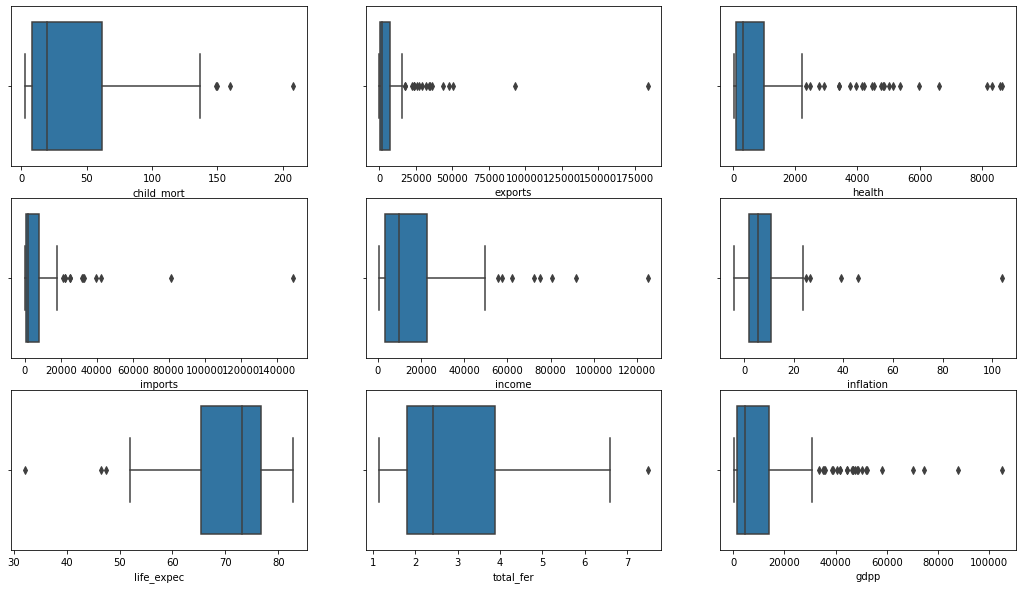

In [103]:
plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(country.child_mort)
plt.subplot(3, 3, 2)
sns.boxplot(country.exports)
plt.subplot(3, 3, 3)
sns.boxplot(country.health)
plt.subplot(3, 3, 4)
sns.boxplot(country.imports)
plt.subplot(3, 3, 5)
sns.boxplot(country.income)
plt.subplot(3, 3, 6)
sns.boxplot(country.inflation)
plt.subplot(3, 3, 7)
sns.boxplot(country.life_expec)
plt.subplot(3, 3, 8)
sns.boxplot(country.total_fer)
plt.subplot(3, 3, 9)
sns.boxplot(country.gdpp)
plt.show()


NOTE: There seemes to be outliers in every single variable. This is a very delicate situation in terms of Business problem statement & Clustering analysis. - If we apply outlier treatment by CAPPING this will change the ranking of few countries with respect to requirement of Financial Aid. Also we will still have some outlier present after Capping, so its not a wise decision in this business scenario. - If we apply outlier treatment by Deletion based on IQR values, this will remove few countries from the list that would have really deserved the Financial Aid. - If we do not apply Outlier treatment, it can impact the clustering model, as the presence of Outlier can change the CENTROID (K-Means) of the cluster. - After considering all these scenarios, Ive decided to go with the model which suites the Business Problem better. That is, not to treat the Outlier, and check the model with different K values to see which one gives a better business outcome.


### Exploratory Data Analysis

Let's make a pairplot of all the numeric variables



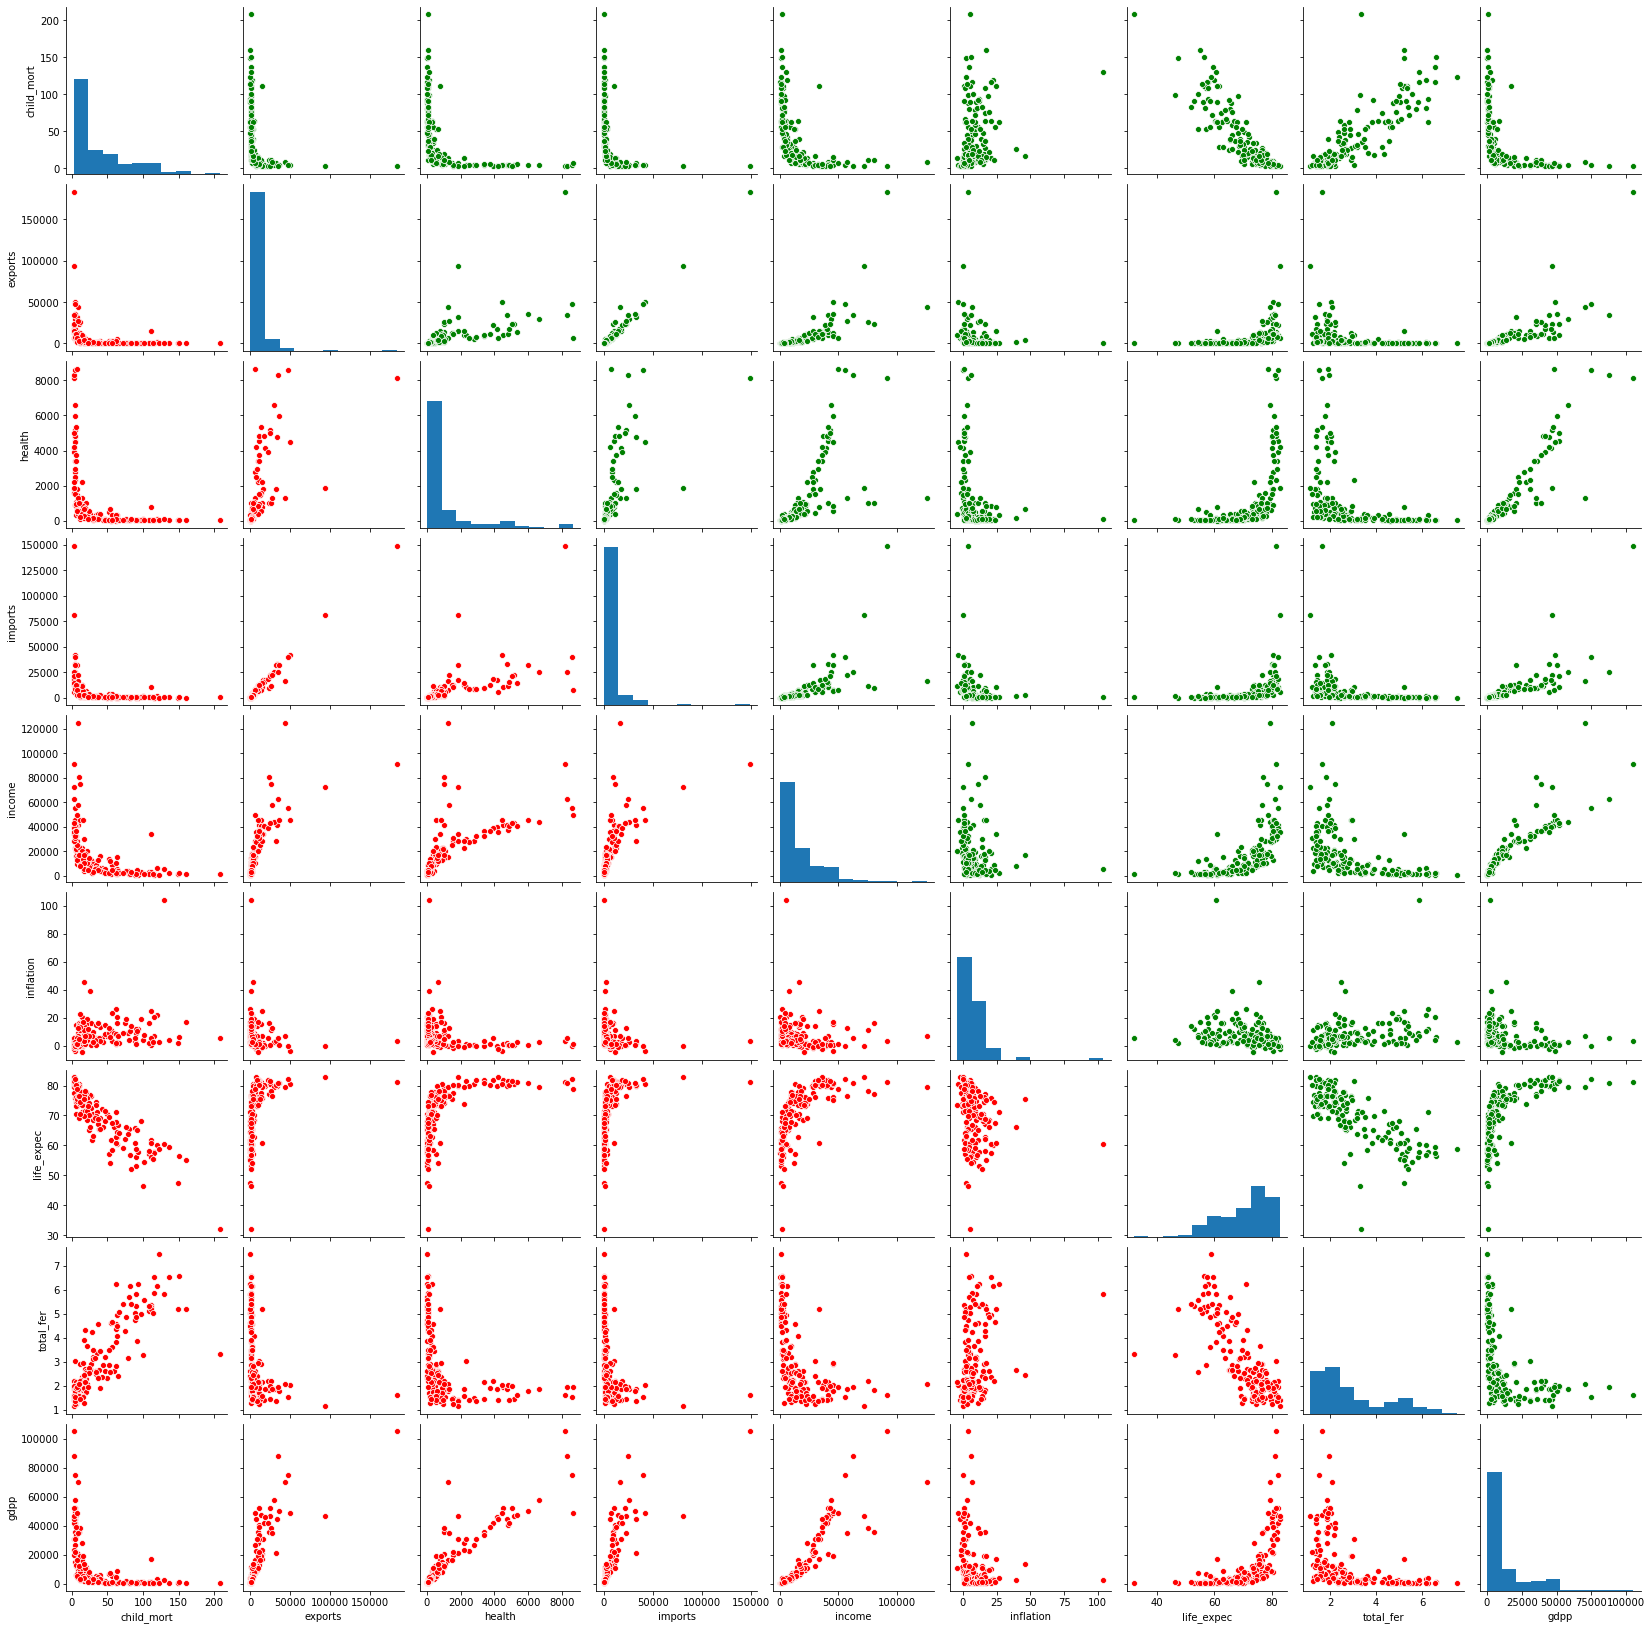

In [104]:
country_num=country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

# sns.pairplot(ngo_num,diag_kind='kde')


g = sns.PairGrid(country_num)
g.map_upper(sns.scatterplot,color='green')
g.map_lower(sns.scatterplot, color='red')
g.map_diag(plt.hist)

plt.show()

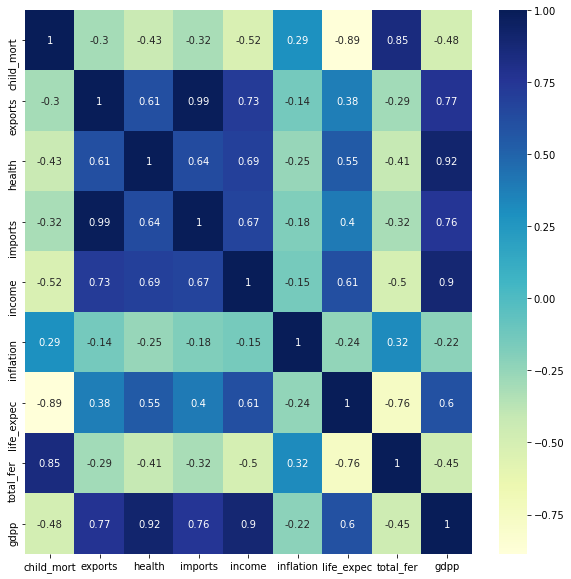

In [186]:
plt.figure(figsize = (10, 10))
sns.heatmap(country_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

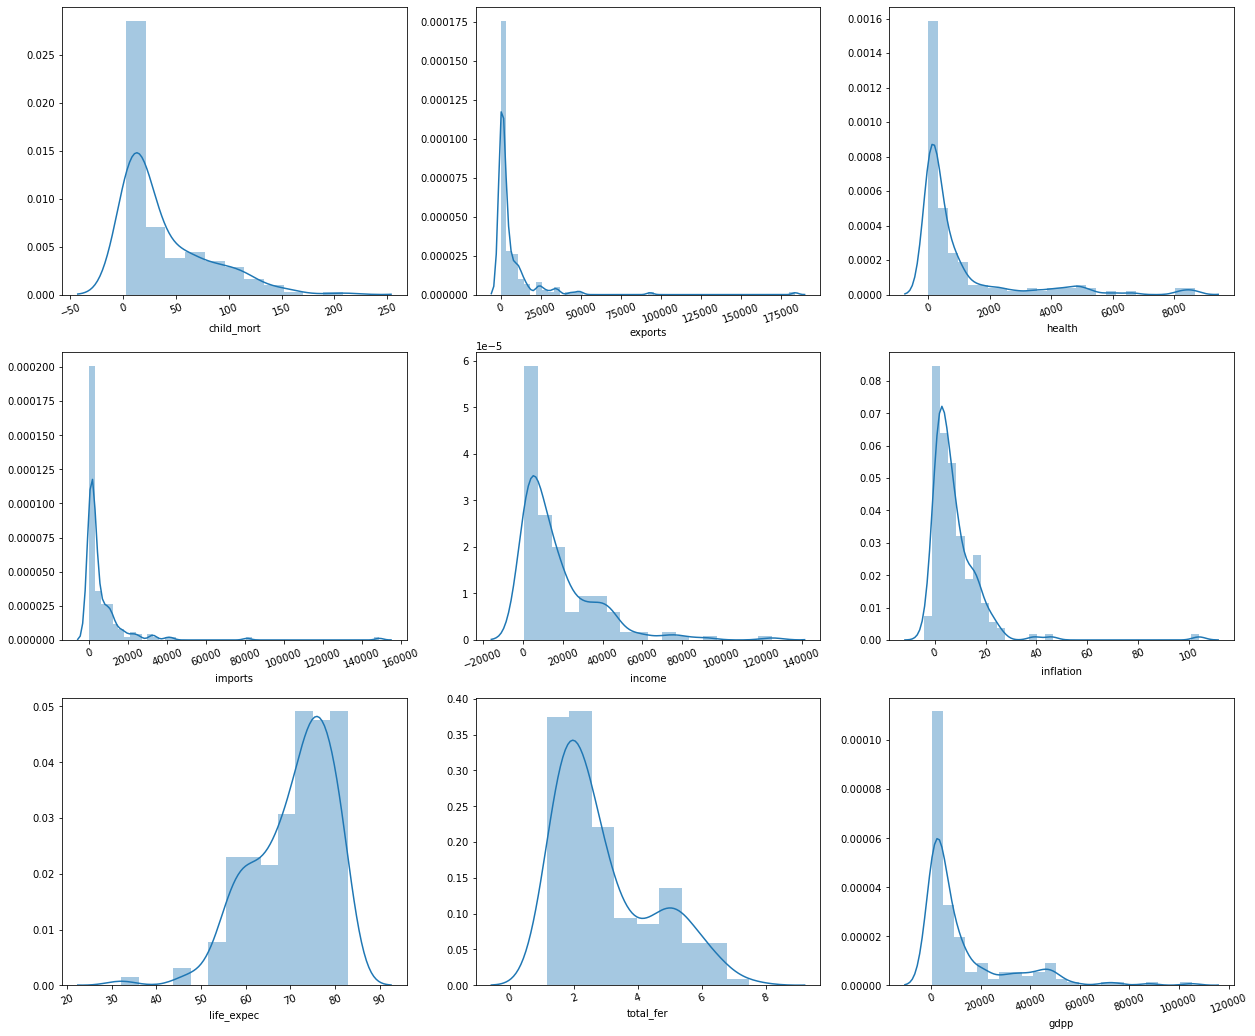

In [105]:
plt.figure(figsize=(21, 18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(country_num[i[1]])
    plt.xticks(rotation=20)

Insight: - Most of the data point are 'NOT Normally' distributed. - Their variance are also differernt. - Their range are also differnt All the above points indicates the need of standardising the data before we build the model. Since we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important here.


### Scaling of data 

We will use Standardisation method for scaling the data.


In [106]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [107]:
# New dataframe with only Numeric variables, for scaling

country_new=country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].copy()


In [108]:
country_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0 KB


In [109]:
country_new.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [110]:
# rescaling

# instantiate
scaler = StandardScaler()

# fit_transform
country_scaled = scaler.fit_transform(country_new)
country_scaled.shape


(167, 9)

In [111]:
country_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [112]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [113]:
#Converting it into a dataframe

country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
country_scaled.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Hopkin's statistics

In [114]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [115]:
hopkins(country_scaled)

0.922034126421444

Insight: - Hopkins Statistic over .70 is a good score that indicated that the data is good for cluster analysis. - A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

## Modelling 

## Hierarchichal clustering

As mentioned in the 'Approach' section, we will use Hierarchical Clustering to identify appropriate cluster size with a good split of data (Max Intra-Cluster distance & Min Inter-Cluster Distance)



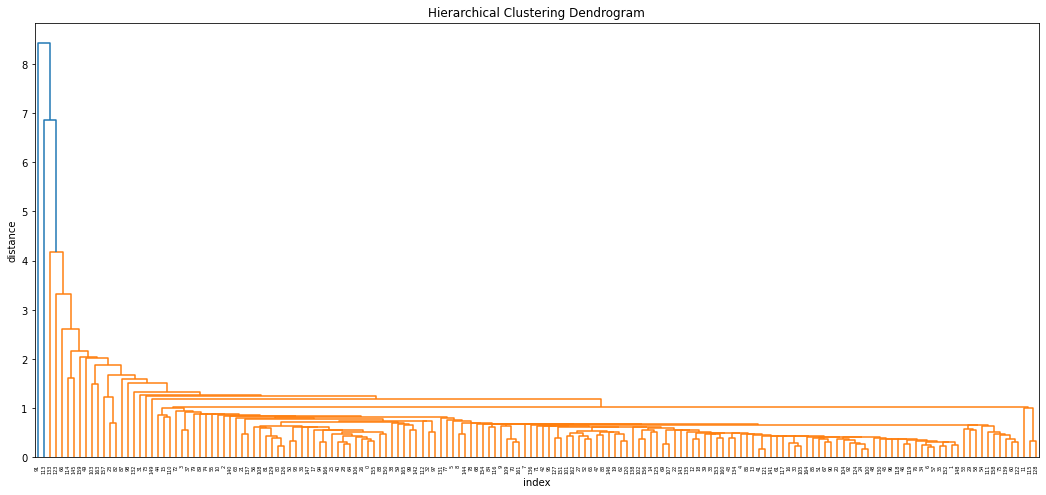

In [116]:
# single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()


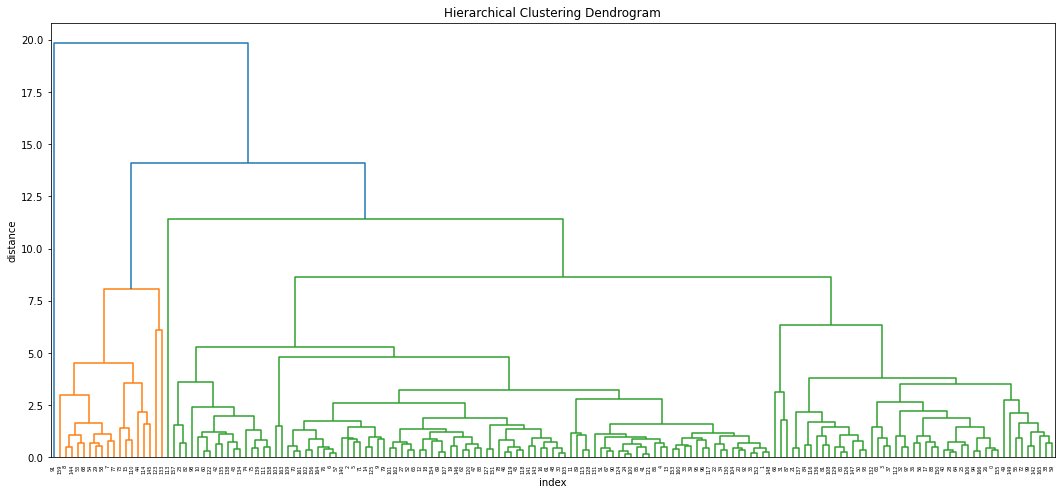

In [117]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()


NOTE: From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation. So we will use Complete linkage output for our further analysis. We will build two iterations of clustering with 3 & 4 clusters (based on inputs from the above Dendrogram with Complete Linkage) and analyse the output.


In [118]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_3


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [119]:
# Create a new datafame with cluster labels to it.
country_h = country.copy()
country_h['cluster_labels_3'] = cluster_labels_3

country_h.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


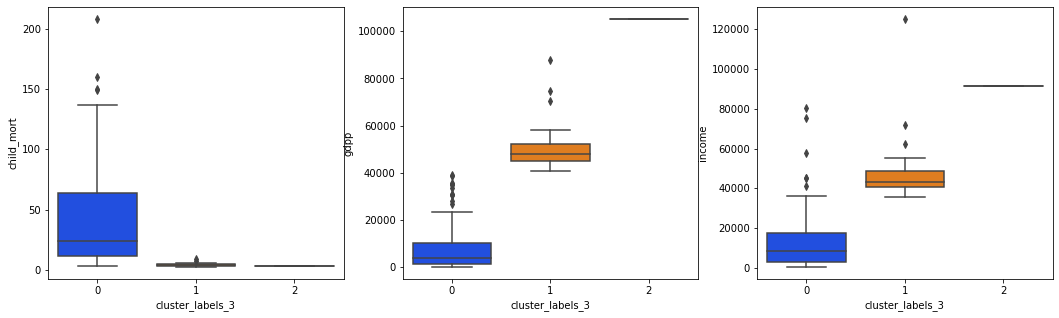

In [120]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_3', y='child_mort', data=country_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_3', y='gdpp', data=country_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_3', y='income', data=country_h, palette="bright")

plt.show()


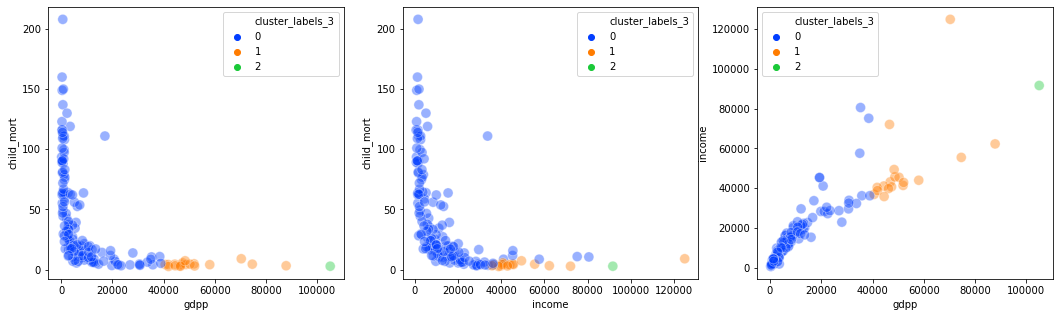

In [121]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_3',
                data=country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_3',
                data=country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_3',
                data=country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()


In [122]:
# Checking cluster count

country_h.cluster_labels_3.value_counts()


0    148
1     18
2      1
Name: cluster_labels_3, dtype: int64

In [123]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

country_h[country_h['cluster_labels_3'] == 2]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2


In [124]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

country_h[country_h['cluster_labels_3'] == 1]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1


### Second iteration using 4 clusters

In [125]:
# 4 clusters
cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels_4


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [126]:
country_h['cluster_labels_4'] = cluster_labels_4

country_h.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [127]:
country_h.shape

(167, 12)

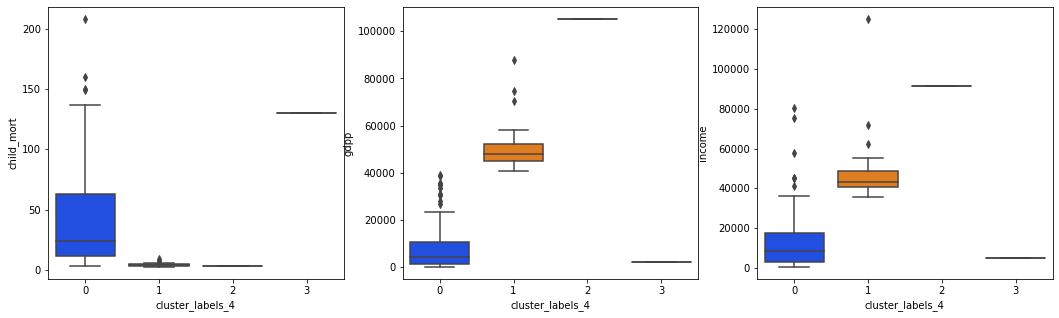

In [128]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_4', y='child_mort', data=country_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_4', y='gdpp', data=country_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_4', y='income', data=country_h, palette="bright")

plt.show()


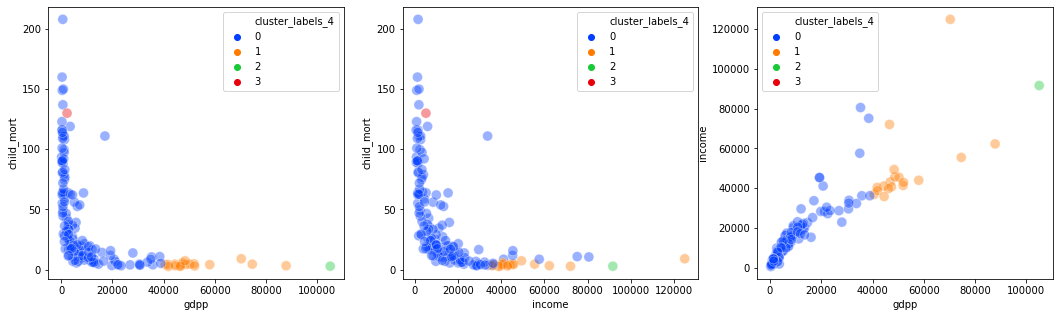

In [129]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_4',
                data=country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_4',
                data=country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_4',
                data=country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()


In [130]:
country_h.cluster_labels_4.value_counts()


0    147
1     18
3      1
2      1
Name: cluster_labels_4, dtype: int64

In [131]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

country_h[country_h['cluster_labels_4'] == 2]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2,2


In [132]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

country_h[country_h['cluster_labels_4'] == 3]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,0,3


In [133]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

country_h[country_h['cluster_labels_4'] == 1]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1,1


INSIGHT: From the above 2 iterations of Hierarchical Clustering, it is evident that 3 CLUSTERS is ideal number of clusters, because when we used 4 clusters, we could see that Nigeria was added as a seperate segment. Since Nigera could be a possible candidate for financial aid in terms of their child mortality rate, we will consider the ideal number of cluster to be 3. We will further validate with other methods below.


In [134]:
#New dataframe for group by & analysis
country_h_analysis =  country_h.groupby(['cluster_labels_3']).mean()
country_h_analysis


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4
cluster_labels_3,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000


In [135]:
# Creating a new field for count of observations in each cluster
country_h_analysis['Observations']=country_h[['cluster_labels_3','child_mort']].groupby(['cluster_labels_3']).count()
country_h_analysis


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4,Observations
cluster_labels_3,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1


In [136]:
# Creating a new field for proportion of observations in each cluster
country_h_analysis['Proportion']=round(country_h_analysis['Observations']/country_h_analysis['Observations'].sum(),2)
country_h_analysis


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4,Observations,Proportion
cluster_labels_3,,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148,0.89
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18,0.11
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1,0.01


<Figure size 576x360 with 0 Axes>

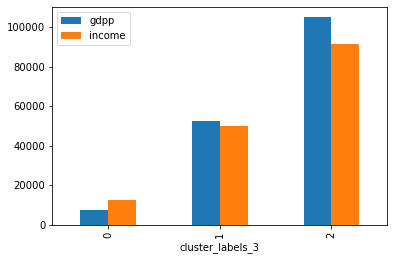

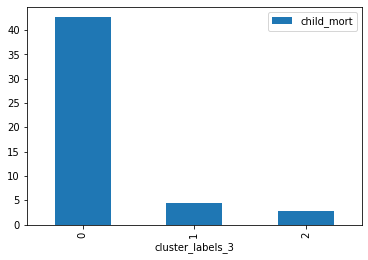

In [137]:
plt.figure(figsize=(8, 5))
country_h_plot1=country_h[['cluster_labels_3','gdpp','income']].copy()
country_h_plot1=country_h_plot1.groupby('cluster_labels_3').mean()
country_h_plot1.plot.bar()

country_h_plot2=country_h[['cluster_labels_3','child_mort']].copy()
country_h_plot2=country_h_plot2.groupby('cluster_labels_3').mean()
country_h_plot2.plot.bar()


Interpretation of Clusters: Cluster 0 has the Highest average Child Mortality rate of ~42 when compared to other 3 clusters, and Lowest average GDPP & Income of ~ 7551 & 12641 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 0 comprises of ~89% of overall data, and has ~148 observations in comparision to 167 total observations This seems to be a problem. This means that Hierarchical clustering is not giving us a good result as 89% of the data points are segmented into that cluster. We also saw that increasing the cluster number is not solving this problem. We will perform K-Means Clustering and check how that turns out to be. ---

## K means clustering

### Finding optimal number of clusters 

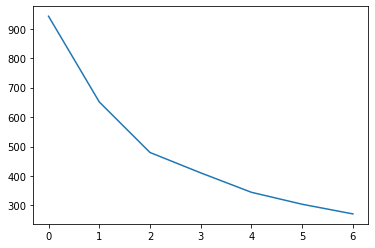

In [138]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)


### silhouette Analysis

In [139]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
 

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.4277518271600435
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.39279369617575527
For n_clusters=7, the silhouette score is 0.298639840493153
For n_clusters=8, the silhouette score is 0.29688916794377307


INSIGHT: From the above validations(Elbow Curve & silhouette analysis), we could see that 3 or 4 clusters are optimal number of clusters to be used. We will try 3 different iterations in K-Means clustering using 3 and 4 Clusters and analyse the results.

### First iteration using 3 clusters 

In [140]:
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_3.fit(country_scaled)


KMeans(max_iter=500, n_clusters=3, random_state=335)

In [141]:
kmeans_3.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [142]:
# Create a new datafame with scaled data and adding country name to it.
country_k = country_h.copy()
country_k.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [143]:
country_k.shape

(167, 12)

In [144]:
# assign the label
country_k['cluster_id_3'] = kmeans_3.labels_
country_k.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,0


In [145]:
# Checking the number of countries in each cluster

country_k.cluster_id_3.value_counts()


0    91
2    48
1    28
Name: cluster_id_3, dtype: int64

### Visualising the clustered data 

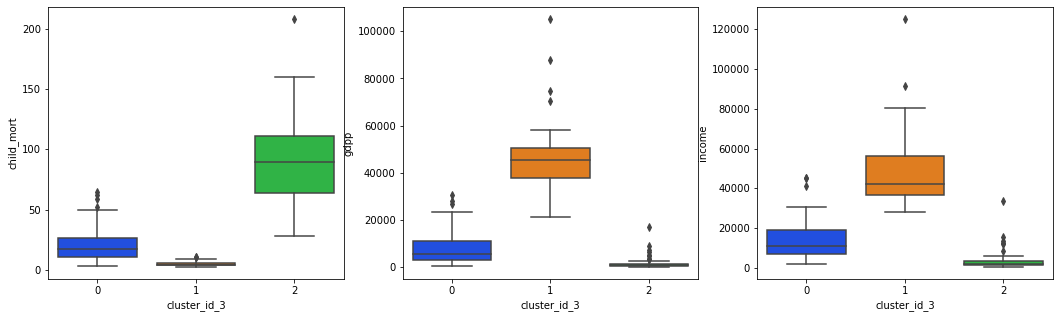

In [146]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_3', y='child_mort',
            data=country_k, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_3', y='gdpp',
            data=country_k, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_3', y='income',
            data=country_k, palette="bright")

plt.show()


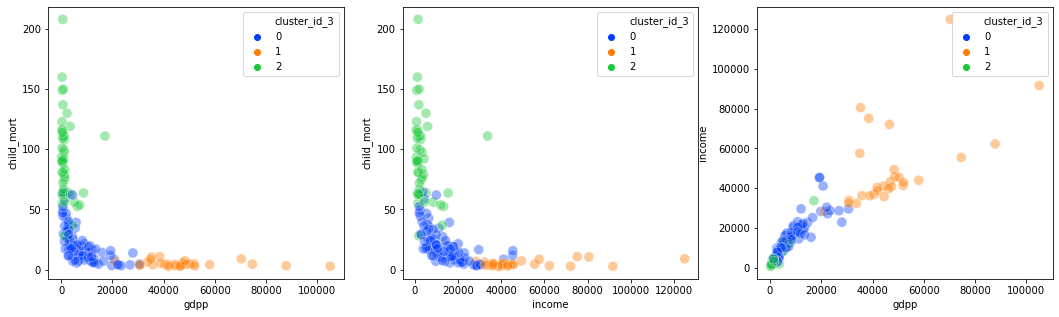

In [147]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_3',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_3',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_3',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()


In [148]:
# Checking the CLuster means:
country_k.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
cluster_id_3,,,,,,,,,,,
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286


INSIGHT: Cluster 2 & Cluster 0 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.

In [149]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

country_k[['country','child_mort','income','gdpp']][country_k['cluster_id_3'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])


,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
37,"Congo, Dem. Rep.",116.0,609,334
25,Burkina Faso,116.0,1430,575


In [150]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

country_h[['country','child_mort','income','gdpp']][country_k['cluster_id_3'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])


,country,child_mort,income,gdpp
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
...,...,...,...,...
138,South Korea,4.1,30400,22100
122,Portugal,3.9,27200,22500
60,Greece,3.9,28700,26900
43,Czech Republic,3.4,28300,19800


### Second iteration using 4 clusters


In [151]:
# K Means with with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_4.fit(country_scaled)


KMeans(max_iter=500, n_clusters=4, random_state=335)

In [152]:
kmeans_4.labels_


array([3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 2, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 1,
       2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 3, 2, 1, 3, 1, 1, 3,
       3, 1, 1, 0, 1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       2, 2, 3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 2, 3, 3, 1, 2, 1, 1, 3, 1, 2, 2, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3], dtype=int32)

In [153]:
# assign the label
country_k['cluster_id_4'] = kmeans_4.labels_
country_k.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,2,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,2,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,0,1


In [154]:
# Checking the number of countries in each cluster

country_k.cluster_id_4.value_counts()


1    87
3    48
2    30
0     2
Name: cluster_id_4, dtype: int64

### Visualizing the clustered data

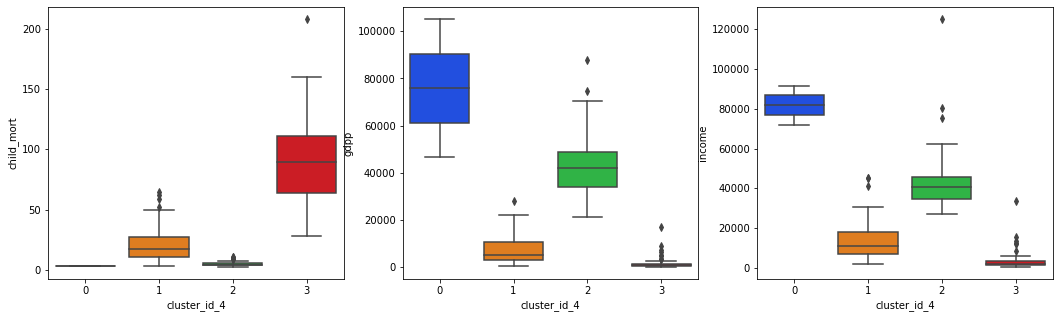

In [155]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_4', y='child_mort',
            data=country_k, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_4', y='gdpp',
            data=country_k, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_4', y='income',
            data=country_k, palette="bright")

plt.show()


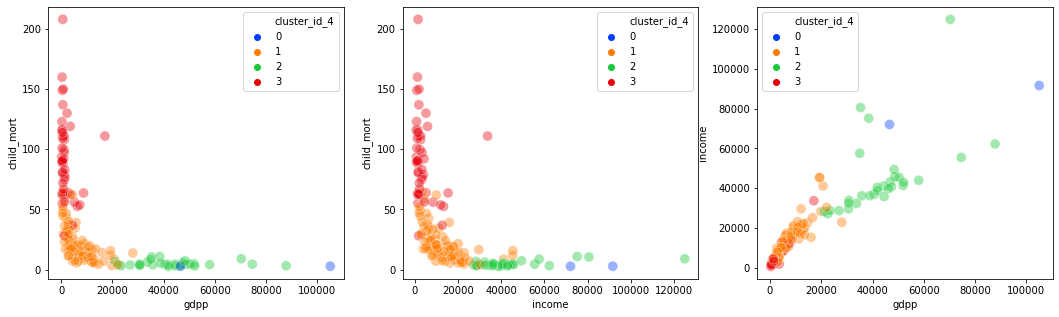

In [156]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_4',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_4',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_4',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()


In [157]:
# Checking the CLuster means:
country_k.groupby(['cluster_id_4']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3
cluster_id_4,,,,,,,,,,,,
3,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,2.000000
1,21.113793,3328.149408,460.000120,3404.497944,13297.586207,7.371506,73.147126,2.251954,7158.298851,0.000000,0.000000,0.000000
2,5.043333,21018.310000,4031.304333,17806.070000,45180.000000,2.764533,80.383333,1.799667,43300.000000,0.566667,0.566667,0.866667
0,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.500000,1.500000,1.000000


INSIGHT: Cluster 3 & Cluster 1 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.


In [158]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.

country_k[['country','child_mort','income','gdpp']][country_k['cluster_id_4'] == 3].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])


,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
37,"Congo, Dem. Rep.",116.0,609,334
25,Burkina Faso,116.0,1430,575


In [159]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

country_k[['country','child_mort','income','gdpp']][country_k['cluster_id_4'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])


,country,child_mort,income,gdpp
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
...,...,...,...,...
14,Belarus,5.5,16200,6030
41,Croatia,5.5,20100,13500
51,Estonia,4.5,22700,14600
138,South Korea,4.1,30400,22100


### Choosing the model

From the above 2 Iterations of K-Means, we could see that using 3 Clusters provided a better output in terms of a balanced cluster size. So we will consider the 'K-Means with 3 Clusters' as our FINAL MODEL



#### Interpreting cluster from k model

In [160]:
#New dataframe for group by & analysis

country_k_analysis =  country_k.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
country_k_analysis


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_4
cluster_id_3,,,,,,,,,,,,
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,3.000000
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000,1.043956
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286,1.857143


In [161]:
# Creating a new field for count of observations in each cluster

country_k_analysis['Observations']=country_k[['cluster_id_3','child_mort']].groupby(['cluster_id_3']).count()
country_k_analysis


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_4,Observations
cluster_id_3,,,,,,,,,,,,,
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,3.000000,48
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000,1.043956,91
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286,1.857143,28


In [162]:
# Creating a new field for proportion of observations in each cluster
country_k_analysis['Proportion']=round(country_k_analysis['Observations']/country_k_analysis['Observations'].sum(),2)


#Summary View
country_k_analysis[['child_mort','income','gdpp','Observations','Proportion']]


,child_mort,income,gdpp,Observations,Proportion
cluster_id_3,,,,,
2,91.610417,3897.354167,1909.208333,48,0.29
0,20.357143,13968.021978,7979.912088,91,0.54
1,5.046429,50178.571429,48114.285714,28,0.17


<Figure size 576x360 with 0 Axes>

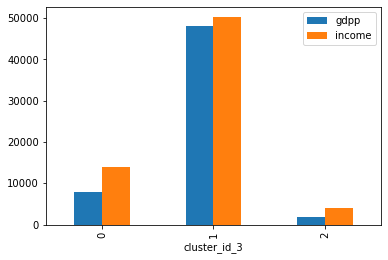

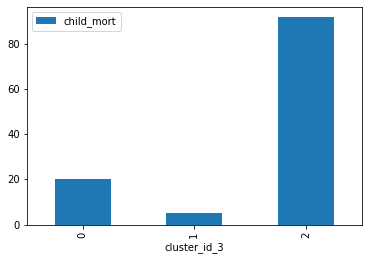

In [163]:
plt.figure(figsize=(8, 5))
country_k_plot1=country_k[['cluster_id_3','gdpp','income']].copy()
country_k_plot1=country_k_plot1.groupby('cluster_id_3').mean()
country_k_plot1.plot.bar()

country_k_plot2=country_k[['cluster_id_3','child_mort']].copy()
country_k_plot2=country_k_plot2.groupby('cluster_id_3').mean()
country_k_plot2.plot.bar()


Interpretation of Clusters: Cluster 2 has the Highest average Child Mortality rate of ~92 when compared to other 3 clusters, and Lowest average GDPP & Income of ~ 1909 & 3897 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 2 comprises of ~29% of overall data, and has ~48 observations in comparision to 167 total observations ---


### Renaming the clusters

In [164]:
country_k_analysis = country_k_analysis.rename({
    2: 'Under_Developed Countries',
    1: 'Developed Countries',
    0: 'Developing Countries'}).reset_index()


In [165]:
country_k_analysis[['cluster_id_3','child_mort','income','gdpp','Observations','Proportion']]


,cluster_id_3,child_mort,income,gdpp,Observations,Proportion
0,Under_Developed Countries,91.610417,3897.354167,1909.208333,48,0.29
1,Developing Countries,20.357143,13968.021978,7979.912088,91,0.54
2,Developed Countries,5.046429,50178.571429,48114.285714,28,0.17


Final Cluster: Based on the above interpretation of the cluster, we now rename all the clusters accordingly. The Cluster 2 now becomes 'Under Developed Countries', which will be of our interest. --- We will further analyse the Cluster 'Under Developed Countries' and get to know various metrics of that data set, based on which we could identify our final set of countries which needs the financial support from the NGO


### Analysing the 'Under Developed Countries' Cluster

In [166]:
country_k.columns


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_labels_3',
       'cluster_labels_4', 'cluster_id_3', 'cluster_id_4'],
      dtype='object')

In [167]:
# Countries in Cluster_id = 0, save to a new dataframe, this will form our final cluster data

final_cluster = country_k[country_k['cluster_id_3'] == 2].copy()
final_cluster = final_cluster[['country', 'child_mort', 'income', 'gdpp']]


In [168]:
final_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])


,country,child_mort,income,gdpp
26,Burundi,93.6,764,231
88,Liberia,89.3,700,327
37,"Congo, Dem. Rep.",116.0,609,334
112,Niger,123.0,814,348
132,Sierra Leone,160.0,1220,399
93,Madagascar,62.2,1390,413
106,Mozambique,101.0,918,419
31,Central African Republic,149.0,888,446
94,Malawi,90.5,1030,459
50,Eritrea,55.2,1420,482


### Decision Making on the final approach

In [169]:
final_cluster.describe()


,child_mort,income,gdpp
count,48.000000,48.000000,48.000000
mean,91.610417,3897.354167,1909.208333
std,34.319855,5590.168621,2925.911009
min,28.100000,609.000000,231.000000
25%,63.675000,1390.000000,551.500000
50%,89.750000,1860.000000,932.000000
75%,111.000000,3522.500000,1465.000000
max,208.000000,33700.000000,17100.000000


NOTE: Looking at the descriptive statistics of our Under Developed Countries cluster, we could notice that some of the countries have really high income and gdpp values (looking at the max values of income & gdpp). From a business problem prespective, we would want our numbers of child mortality, income and gdpp somewhere around the MEDIAN level (We decided to go with MEDIAN and not MEAN, as there seems to be a greater variablity in the income and gdpp values). So the approach we are going to take is to filter out all countries from our original list with income & gdpp less than the Median of 1860 & 932 respectively and Child Mortality >= the Median of 90. --- We will perform the filtering in the order GDPP --> INCOME --> CHILD MORTALITY --- This is due to reason that, we need to identify the countries with lowest GDPP & INCOME first and then with maximum CHILD MORTALITY. This is based on the understanding that, countries with highest child mortality and having higher gdpp & income will not have any impact on the child mortality rate even after the financial aid.


#### Fetching the final data based on Cluster Median¶
#### Data less than median of gdpp of the cluster

NOTE: We could see that the Median values of gdpp for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 932.


In [170]:
Under_Developed_Countries = country[country['gdpp'] <= 932].copy()
# Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['gdpp'] <= 932]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [171]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]


,country,child_mort,gdpp,income
26,Burundi,93.6,231,764
88,Liberia,89.3,327,700
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
93,Madagascar,62.2,413,1390
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
50,Eritrea,55.2,482,1420


In [172]:
Under_Developed_Countries.shape

(29, 10)

### Data less than median of income of the cluster¶

In [173]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['income'] <= 1860]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [174]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]


,country,child_mort,gdpp,income
26,Burundi,93.6,231,764
88,Liberia,89.3,327,700
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
93,Madagascar,62.2,413,1390
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
50,Eritrea,55.2,482,1420


In [175]:
Under_Developed_Countries.shape


(21, 10)

#### Data greater than median of child mortality rate of the final cluster¶


NOTE: We could see that the Median values of Child Mortality for 'Under Developed Countries' is ~90. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with Child Mortality >= 90.


In [176]:
# We create a new dataframe to store the countries satisfying the cluster median from original dataframe

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['child_mort'] >= 90]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])


In [177]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]


,country,child_mort,gdpp,income
26,Burundi,93.6,231,764
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
150,Togo,90.3,488,1210
64,Guinea-Bissau,114.0,547,1390
0,Afghanistan,90.2,553,1610


In [178]:
Under_Developed_Countries.shape

(14, 10)

#### Descriptive Statistics of Cluster 'Under_Developed_Countries'¶


In [179]:
# Save the top 10 underdeveloped list to a new df

UDC_top_10=Under_Developed_Countries[['country', 'gdpp', 'income', 'child_mort']].head(10).copy()

In [180]:
UDC_top_10

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2


In [181]:
UDC_top_10.describe()

,gdpp,income,child_mort
count,10.00000,10.000000,10.00000
mean,422.40000,1045.300000,112.76000
std,99.62396,309.034356,25.11344
min,231.00000,609.000000,90.20000
25%,360.75000,832.500000,91.27500
50%,432.50000,974.000000,107.50000
75%,480.75000,1217.500000,121.25000
max,553.00000,1610.000000,160.00000


### Univariate Analysis of Cluster 'Under_Developed_Countries' (recommended 10)¶


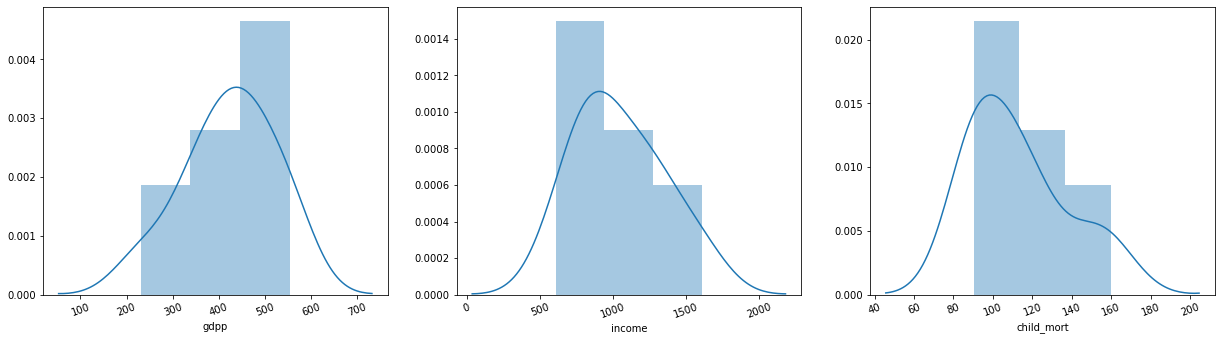

In [182]:
plt.figure(figsize=(21, 18))
features = ['gdpp','income','child_mort']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(UDC_top_10[i[1]])
    plt.xticks(rotation=20)


### Bivariate Analysis of Cluster 'Under_Developed_Countries' (recommended 10)¶


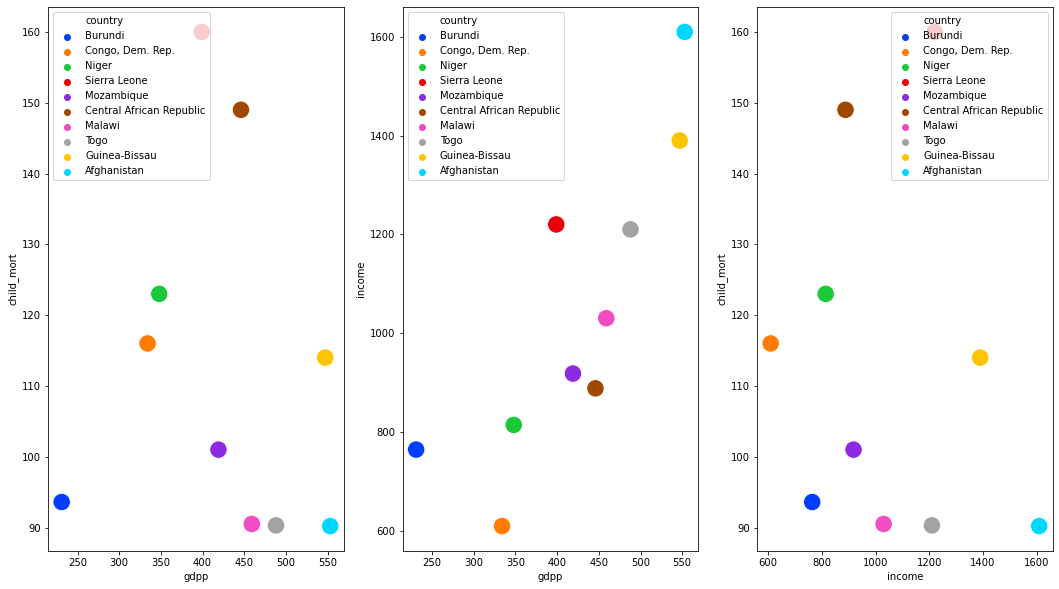

In [183]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.show()


## Conclusion

We performed CLUSTERING on the socio-economic data provided for various countries to identify countries to recommend for Financial Aid from the NGO. Based on our Clustering Analysis, we have below the top countries under our 'Under Developed Countries' cluster which are in dire need of the Financial Aid. This output is purely based on the dataset we used and various analytical methodology we performed.


In [184]:
#TOP COUNTRIES recommended for Financial Aid

UDC_top_10


,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2
